# 读取文件并提取信息

这里有一个如何读取文件并从中提取信息的例子。

假设在这样一个文件夹中有一些 g16log 文件：

In [1]:
! ls -l ../../tests/test_files/g16log/

total 33748
-rw-r--r-- 1 cathayana cathayana  727184 Feb 20 11:47 11_Opt.log
-rw-r--r-- 1 cathayana cathayana   53139 Feb 20 11:47 3_Sp.log
-rw-r--r-- 1 cathayana cathayana 8008984 Feb 20 11:47 RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt.log
-rw-r--r-- 1 cathayana cathayana 1424205 Feb 20 11:47 S_Ph_Ni_TS.log
-rw-r--r-- 1 cathayana cathayana 1910081 Feb 20 11:47 TS_4cGKps_ll_ad_4-18_6-13_optts_g16.log
-rw-r--r-- 1 cathayana cathayana   65746 Feb 20 11:47 TS_4cGKps_ll_ad_4-18_6-13_sp_g16.log
-rw-r--r-- 1 cathayana cathayana 3896697 Feb 20 11:47 TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16.log
-rw-r--r-- 1 cathayana cathayana 1307536 Feb 20 11:47 TS_ts_guess_FaFxyx_template_4-18_6-13_optts_conf_g16.log
-rw-r--r-- 1 cathayana cathayana  165117 Feb 20 11:47 dsgdb9nsd_000001-3-.log
-rw-r--r-- 1 cathayana cathayana  823921 Feb 20 11:47 dsgdb9nsd_000107-3-.log
-rw-r--r-- 1 cathayana cathayana  703600 Feb 20 11:47 dsgdb9nsd_000180-9-.log
-rw-r--r-- 1 cathayana cathayana  

看起来很混乱？是的，它们是来自不同项目的混合物。MolOP 可以帮助你读取文件，并通过通用方法从中提取信息。

In [2]:
from molop import AutoParser
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole  # for better drawing

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400, 400

files = AutoParser("../../tests/test_files/g16log/*.log")

MolOP parsing with 28 jobs: 100%|██████████| 39/39 [00:03<00:00, 10.59it/s]
0 files failed to parse, 39 successfully parsed


我们首先可以获得文件的摘要。摘要包含文件的结构信息（SMILES）和一些关键的 QM 信息。

In [3]:
print(files.to_summary_df().to_markdown())

|    | parser       | file_name                                                                    | file_path                                                                                                                 | file_format   |   charge |   multiplicity | SMILES                                                                                                 | status                                                                                                                                                                                                   |        ZPE |        TCE |        TCH |        TCG |   ZPE-Gas |     E-Gas |     H-Gas |     G-Gas |         sp |     HOMO |     LUMO |     GAP |   first freq | first freq tag   |   second freq | second freq tag   |     S**2 |        S |
|---:|:-------------|:-----------------------------------------------------------------------------|:-------------------------------------------------------------------------------------

我们关注这些日志文件中的 TS。

In [4]:
TS_files = files.filter_TS()
print(TS_files.to_summary_df().to_markdown())

|    | parser       | file_name                                                                    | file_path                                                                                                                 | file_format   |   charge |   multiplicity | SMILES                                                                                                 | status                                                                                                                                                                                                   |      ZPE |      TCE |      TCH |      TCG |   ZPE-Gas |    E-Gas |    H-Gas |    G-Gas |       sp |     HOMO |     LUMO |     GAP |   first freq | first freq tag   |   second freq | second freq tag   |   S**2 |   S |
|---:|:-------------|:-----------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------

原子数不多的情况

In [5]:
TS_files[2][-1].rdmol

The numeric features (like totoal energy)
数值特征（如总能量）

In [6]:
TS_files[2][-1].energy

-1287.35981 <Unit('hartree / particle')>

In [7]:
TS_files[2][-1].alpha_energy

{'gap': 0.15816 <Unit('hartree / particle')>,
 'homo': -0.25863 <Unit('hartree / particle')>,
 'lumo': -0.10047 <Unit('hartree / particle')>}

输出单位可以转化为由[pint](https://pint.readthedocs.io/en/stable/)提供的其他单位。

In [8]:
TS_files[2][-1].energy.to("kcal/mol")

-807830.4773030282 <Unit('kilocalorie / mole')>

序列特征（如轨道、频率）

In [9]:
TS_files[2][-1].alpha_FMO_orbits[:10]

[-24.73197 <Unit('hartree / particle')>,
 -24.73103 <Unit('hartree / particle')>,
 -24.72836 <Unit('hartree / particle')>,
 -19.19597 <Unit('hartree / particle')>,
 -19.14519 <Unit('hartree / particle')>,
 -19.13671 <Unit('hartree / particle')>,
 -19.13657 <Unit('hartree / particle')>,
 -19.13465 <Unit('hartree / particle')>,
 -14.42477 <Unit('hartree / particle')>,
 -14.38013 <Unit('hartree / particle')>]

也提供无量纲特征

In [10]:
TS_files[2][-1].dimensionless_alpha_energy

{'gap': 0.15816, 'homo': -0.25863, 'lumo': -0.10047}

顺序无量纲特征作为生成器提供

In [11]:
TS_files[2][-1].dimensionless_frequencies.__next__()

{'freq': -300.8307,
 'is imaginary': True,
 'reduced masses': 11.3735,
 'IR intensities': 63.598,
 'force constants': 0.6064,
 'normal coordinates': [(0.08, -0.0, -0.05),
  (0.08, -0.05, -0.04),
  (0.06, -0.14, -0.0),
  (0.03, -0.04, -0.0),
  (0.03, -0.49, -0.01),
  (-0.04, 0.16, 0.03),
  (-0.13, -0.27, 0.03),
  (-0.03, -0.08, 0.03),
  (0.0, 0.01, 0.02),
  (-0.04, -0.01, -0.02),
  (-0.03, -0.07, -0.01),
  (-0.02, -0.02, 0.01),
  (-0.0, 0.03, 0.0),
  (0.08, 0.37, -0.02),
  (-0.08, 0.07, 0.0),
  (-0.04, -0.01, 0.0),
  (-0.12, 0.08, 0.01),
  (-0.04, 0.0, 0.0),
  (0.01, 0.54, 0.02),
  (0.06, 0.01, -0.0),
  (0.05, -0.05, -0.01),
  (0.06, -0.03, 0.01),
  (0.05, -0.02, 0.01),
  (0.09, 0.01, -0.05),
  (0.06, 0.01, -0.04),
  (0.1, -0.0, -0.05),
  (0.05, -0.17, 0.01),
  (0.03, 0.03, -0.03),
  (0.01, 0.03, 0.01),
  (-0.02, 0.04, 0.06),
  (0.0, 0.01, 0.01),
  (0.0, -0.02, -0.0),
  (-0.06, -0.0, 0.05),
  (0.07, -0.02, 0.01),
  (0.05, -0.01, 0.0),
  (0.04, -0.02, -0.0)]}

MolOP 可以从具有独特虚频方向的 TS 结构中推断出 TS 前和 TS 后结构。

In [12]:
Draw.MolsToGridImage(TS_files[2][-1].possible_pre_post_ts())

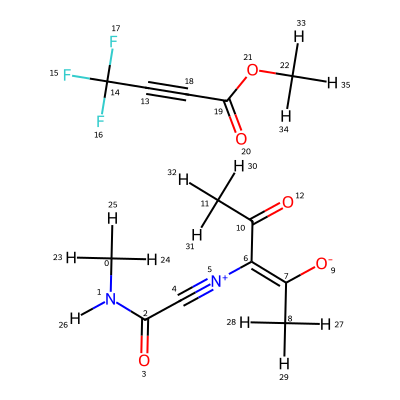

In [13]:
TS_files[2][-1].possible_pre_post_ts()[1]

In [14]:
TS_files[2][-1].imaginary_frequencies

[{'is imaginary': True,
  'freq': -300.8307 <Unit('reciprocal_centimeter')>,
  'reduced masses': 11.3735 <Unit('unified_atomic_mass_unit')>,
  'force constants': 0.6064 <Unit('millidyne / angstrom')>,
  'IR intensities': 63.598 <Unit('kilomole / mole')>,
  'normal coordinates': array([[ 0.08, -0.  , -0.05],
         [ 0.08, -0.05, -0.04],
         [ 0.06, -0.14, -0.  ],
         [ 0.03, -0.04, -0.  ],
         [ 0.03, -0.49, -0.01],
         [-0.04,  0.16,  0.03],
         [-0.13, -0.27,  0.03],
         [-0.03, -0.08,  0.03],
         [ 0.  ,  0.01,  0.02],
         [-0.04, -0.01, -0.02],
         [-0.03, -0.07, -0.01],
         [-0.02, -0.02,  0.01],
         [-0.  ,  0.03,  0.  ],
         [ 0.08,  0.37, -0.02],
         [-0.08,  0.07,  0.  ],
         [-0.04, -0.01,  0.  ],
         [-0.12,  0.08,  0.01],
         [-0.04,  0.  ,  0.  ],
         [ 0.01,  0.54,  0.02],
         [ 0.06,  0.01, -0.  ],
         [ 0.05, -0.05, -0.01],
         [ 0.06, -0.03,  0.01],
         [ 0.05, -0